### **MODELOS DE REGRESIÓN**


### **1.Instalación de Librerias**



In [20]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

### **2. Importación del caso de intensidad**

In [21]:
data = pd.read_csv('Picos_Intensidad_Regresion.csv')

### **3. Exploracion de datos**

In [22]:
# Exploracion inicial
data.head()

,Unnamed: 0,Presion,Intensidad de impactos,Tonelaje,Velocidad,%Solidos,Potencia,F80,Brazo
0,316,6144.83,52.49,3323.11,8.83,74.20,10869.21,67.60,2.01
1,317,6143.40,52.83,3293.34,8.83,74.47,10867.19,67.42,1.99
2,318,6139.66,54.74,3331.12,8.83,74.50,10795.39,67.46,2.00
3,319,6138.42,57.07,3289.88,8.84,74.50,10801.26,67.08,2.01
4,320,6135.47,54.66,3286.99,8.84,74.26,10883.07,66.57,2.01


In [23]:
# Revision de la vriables individuales
data.describe()

,Unnamed: 0,Presion,Intensidad de impactos,Tonelaje,Velocidad,%Solidos,Potencia,F80,Brazo
count,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000
mean,8112.488348,6015.786763,37.356645,3363.326903,8.839000,75.487416,11667.772478,64.747783,2.186024
std,4274.733801,134.324754,17.453158,537.442267,0.536565,7.061388,1569.146488,13.439820,0.226976
min,316.000000,5566.500000,13.270000,0.050000,0.010000,0.000000,-23.010000,7.640000,-0.820000
25%,4463.500000,5946.590000,20.570000,3092.900000,8.720000,74.330000,10713.705000,55.095000,2.020000
50%,8168.000000,6032.640000,36.090000,3357.810000,8.870000,75.980000,11353.280000,66.530000,2.160000
75%,11818.500000,6104.040000,52.120000,3662.140000,8.940000,77.850000,12634.270000,76.280000,2.370000
max,15419.000000,6483.500000,155.670000,4547.040000,9.340000,84.830000,15750.450000,91.370000,2.750000


In [24]:
# identificando valores Nulos
data.isnull().sum().sort_values(ascending=False)

Brazo                     0
F80                       0
Potencia                  0
%Solidos                  0
Velocidad                 0
Tonelaje                  0
Intensidad de impactos    0
Presion                   0
Unnamed: 0                0
dtype: int64

In [25]:
# Dimensiones de la tabla de modelamiento (fila, Columna)
data.shape

(14375, 9)

In [26]:
data['Intensidad de impactos']

0        52.49
1        52.83
2        54.74
3        57.07
4        54.66
         ...  
14370    16.08
14371    27.06
14372    62.38
14373    53.74
14374    21.70
Name: Intensidad de impactos, Length: 14375, dtype: float64

In [27]:
data.shape[0]

14375

In [28]:
data.columns

Index(['Unnamed: 0', 'Presion', 'Intensidad de impactos', 'Tonelaje',
       'Velocidad', '%Solidos', 'Potencia', 'F80', 'Brazo'],
      dtype='object')

### **4. Separando una muestra para verificar resultado de estrategias de muestreo**

In [12]:
# Seleccionaremos un 25% de los datos para estrudiar el beneficio de las estretgias de muestreo

X = data[['Presion', 'Tonelaje', 'Velocidad', '%Solidos','Potencia', 'F80', 'Brazo']]
y = data[['Intensidad de impactos']]

import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,test_size=0.25, random_state=101)

### **5. Evaluando la escenarios de modelamiento RandomForest**

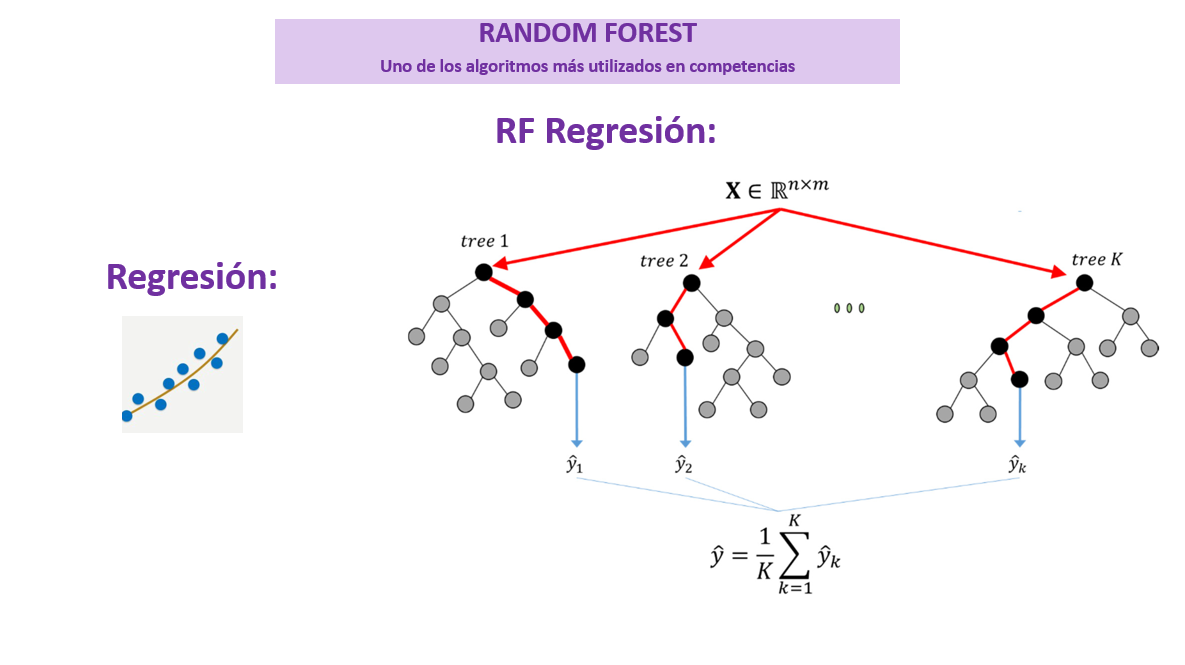

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor

In [30]:
model1 = RandomForestRegressor()
model2 = RandomForestRegressor(n_estimators=20, max_depth=8)

model3 = Lasso()
model4 = Ridge()
model5 = LinearRegression()
model6 = DecisionTreeRegressor()
model7 = KNeighborsRegressor()
model8 = ElasticNet()


model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)
model5.fit(X_train, y_train)
model6.fit(X_train, y_train)
model7.fit(X_train, y_train)
model8.fit(X_train, y_train)

<ipython-input-30-089926602514>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model1.fit(X_train, y_train)
<ipython-input-30-089926602514>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(X_train, y_train)


ElasticNet()

In [36]:
# Error de test del modelo inicial
# ==============================================================================
from sklearn.metrics import mean_squared_error

pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)
pred4 = model4.predict(X_test)
pred5 = model5.predict(X_test)
pred6 = model6.predict(X_test)
pred7 = model7.predict(X_test)
pred8 = model8.predict(X_test)


rmse1 = mean_squared_error(
        y_true  = y_test,
        y_pred  = pred1,
        squared = False
       )
rmse2 = mean_squared_error(
        y_true  = y_test,
        y_pred  = pred2,
        squared = False
       )
rmse3 = mean_squared_error(
        y_true  = y_test,
        y_pred  = pred3,
        squared = False
       )
rmse4 = mean_squared_error(
        y_true  = y_test,
        y_pred  = pred4,
        squared = False
       )
rmse5 = mean_squared_error(
        y_true  = y_test,
        y_pred  = pred5,
        squared = False
       )
rmse6 = mean_squared_error(
        y_true  = y_test,
        y_pred  = pred6,
        squared = False
       )
rmse7 = mean_squared_error(
        y_true  = y_test,
        y_pred  = pred7,
        squared = False
       )
rmse8 = mean_squared_error(
        y_true  = y_test,
        y_pred  = pred8,
        squared = False
       )

print(f"El error (rmse) de test es: {rmse1}")
print(f"El error (rmse) de test es: {rmse2}")
print(f"El error (rmse) de test es: {rmse3}")
print(f"El error (rmse) de test es: {rmse4}")
print(f"El error (rmse) de test es: {rmse5}")
print(f"El error (rmse) de test es: {rmse6}")
print(f"El error (rmse) de test es: {rmse7}")
print(f"El error (rmse) de test es: {rmse8}")

El error (rmse) de test es: 2.978708051334716
El error (rmse) de test es: 3.979271075562983
El error (rmse) de test es: 10.14700065006219
El error (rmse) de test es: 9.287680558176003
El error (rmse) de test es: 9.287701839314247
El error (rmse) de test es: 4.595227121511504
El error (rmse) de test es: 4.569531983550642
El error (rmse) de test es: 11.277709878731041


In [38]:
pred3

array([24.83345066, 34.59258477, 21.61548647, ..., 26.2782242 ,
       25.75145254, 46.86226735])

In [42]:
from sklearn.metrics import r2_score
r2_score(y_test,pred2)

0.9472043329651021